# Tarea 2

**Autor:** Alejandro Zarate Macias  
**Curso:** Métodos Matemáticos para Análisis de Datos  
**Fecha:** 01 de Septiembre 2025

---

## Introducción

En este notebook se abordan los problemas 6, 9 y 10 de la Tarea 3, relacionados con la optimizacion de multiples funciones y encontrar sus valores minimos o donde la funcion tiende a 0.
El objetivo principal es desarrollar códigos que permitan calcular, analizar y visualizar los resultados de estas optimizaciones.

---

# Problema 6

Para cada una de las siguientes funciones, encuentre sus puntos críticos y clasifíquelos. Luego, use Python para crear gráficos de contorno de ellas y verificar sus resultados.

$f(x,y) = \ln(x^{2} + y^{2} + 1)$ 

$f(x,y) = x^{2} + y^{2} - x - y + 1$ 

$f(x,y) = e^{x}\cos(y)$ 

$f(x,y) = (x^{2} + y - 11)^{2} + (x + y^{2} - 7)^{2}$


## Métodos

In [1]:
import numpy as np                   # Manejo de vectores y matrices
import matplotlib.pyplot as plt      # Visualización de datos
from typing import Callable          # Tipado de tipo funcion

In [2]:
def graficar_contorno(funcion: Callable, 
                      puntos_xy: list = [], 
                      xlim=(-5, 5), 
                      ylim=(-5, 5), 
                      resolucion: int = 100, 
                      niveles: int = 30,
                      titulo: str = "") -> None:
    """
    Grafica el contorno de una función de dos variables en el plano XY.

    Args:
        funcion (Callable): Función f(x, y) que se desea graficar.
        puntos_xy (list): Lista de puntos (x, y) a resaltar en la gráfica.
        xlim (tuple): Límite inferior y superior para el eje x. Por defecto (-5, 5).
        ylim (tuple): Límite inferior y superior para el eje y. Por defecto (-5, 5).
        resolucion (int): Número de puntos en cada eje para la malla. Por defecto 100.
        niveles (int): Número de niveles de contorno. Por defecto 30.
        titulo (str): Título de la gráfica. Por defecto "".

    Retorna:
        None. Muestra la gráfica de contornos en pantalla.
    """

    x = np.linspace(xlim[0], xlim[1], resolucion)
    y = np.linspace(ylim[0], ylim[1], resolucion)
    X, Y = np.meshgrid(x, y)
    
    Z = funcion(X, Y)
    
    plt.figure(figsize=(10, 8))
    
    plt.contourf(X, Y, Z, levels=niveles, alpha=0.3, cmap='coolwarm')
    
    for i, (px, py) in enumerate(puntos_xy):
        plt.plot(px, py, 'ro', markersize=8, markeredgecolor='black', markeredgewidth=1)
        plt.annotate(f'x_{i+1}', (px, py), xytext=(5, 5), 
                    textcoords='offset points', fontsize=12, fontweight='bold')

    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'Gráfica de Contornos de la Función {titulo}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Valor de la función')
    plt.axis('equal')

    plt.show()

def funcion_a(x: float, y: float) -> float:
    # f(x,y) = ln(x² + y² + 1)
    return np.log(x**2 + y**2 + 1)

def funcion_b(x: float, y: float) -> float:
    # f(x,y) = x² + y² - x - y + 1
    return x**2 + y**2 - x - y + 1

def funcion_c(x: float, y: float) -> float:
    # f(x,y) = e^xcos(y)
    return np.exp(x) * np.cos(y)

def funcion_d(x: float, y: float) -> float:
    # f(x,y) = (x² + y - 11)² + (x + y² - 7)²
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

## Resultados

In [3]:
# Definición de los puntos criticos encontrados en la parte teorica para su correspondiente prueba
puntos_a = [(0, 0)]
puntos_b = [(1/2, 1/2)]
puntos_c = []
puntos_d = [(3, 2), 
            (-2.805118, 3.131312),
            (-3.779310, -3.283186),
            (3.584428, -1.848126)]

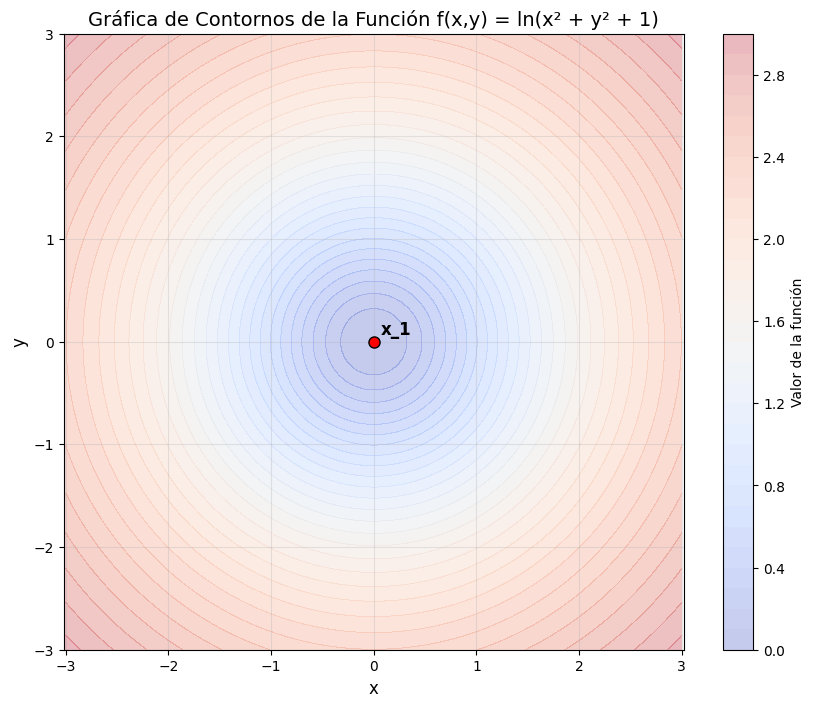

In [4]:
# Graficar la funcion (a) f(x,y) = ln(x² + y² + 1)
graficar_contorno(funcion_a, puntos_a, xlim=(-3, 3), ylim=(-3, 3), resolucion=100, niveles=30, titulo="f(x,y) = ln(x² + y² + 1)")

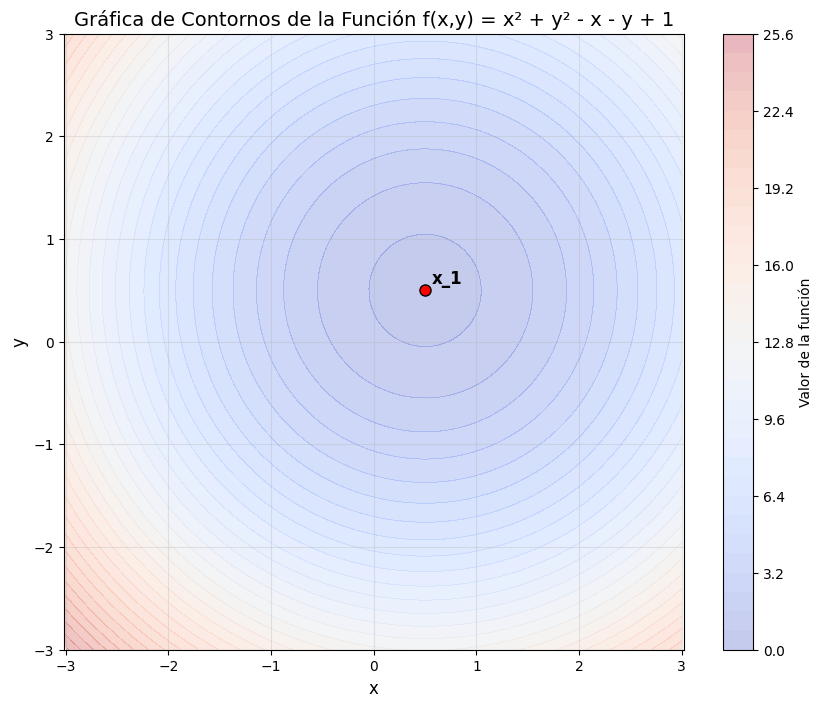

In [5]:
# Graficar la funcion (b) f(x,y) = x² + y² - x - y + 1
graficar_contorno(funcion_b, puntos_b, xlim=(-3, 3), ylim=(-3, 3), resolucion=100, niveles=30, titulo="f(x,y) = x² + y² - x - y + 1")

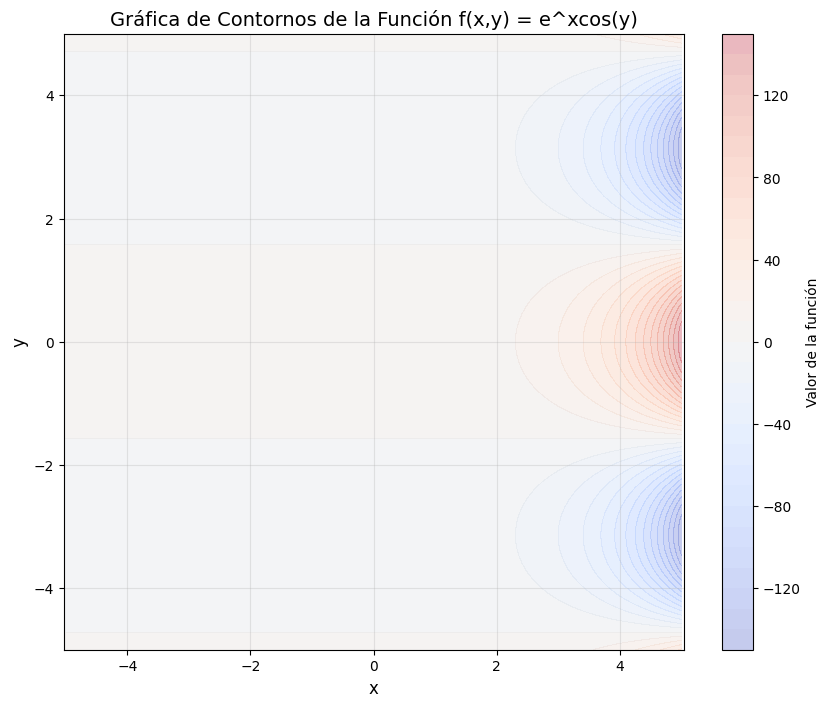

In [6]:
# Graficar la funcion (c) f(x,y) = e^xcos(y)
graficar_contorno(funcion_c, puntos_c, xlim=(-5, 5), ylim=(-5, 5), resolucion=100, niveles=30, titulo="f(x,y) = e^xcos(y)")

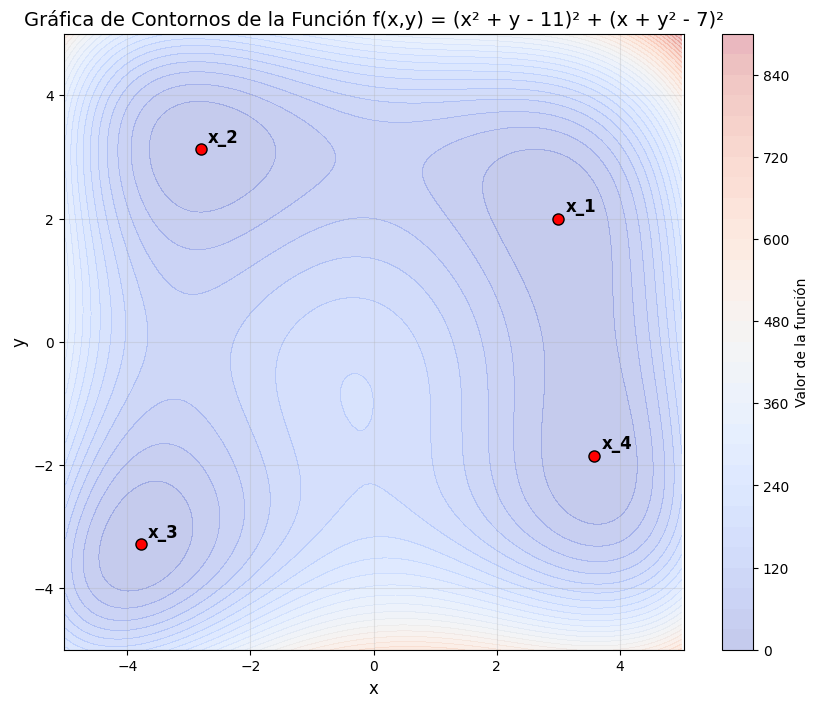

In [7]:
# Graficar la funcion (d) f(x,y) = (x² + y - 11)² + (x + y² - 7)²
graficar_contorno(funcion_d, puntos_d, xlim=(-5, 5), ylim=(-5, 5), resolucion=100, niveles=30, titulo="f(x,y) = (x² + y - 11)² + (x + y² - 7)²")

# Problema 9

Considere las siguientes funciones:


$f(\mathbf{x}) = \sum_{i=1}^{n} x_i^{2}$

$f(x,y) = (x^{2}+y-11)^{2} + (x+y^{2}-7)^{2}$

$f(\mathbf{x}) = \sum_{i=1}^{n-1} \bigl[100(x_{i+1}-x_i^{2})^{2} + (x_i-1)^{2}\bigr]$



- Crea un script en Python para aproximar sus gradientes y Hessianos, evaluados en un punto particular $\mathbf{x}$, utilizando diferencias finitas.
- Encuentre sus puntos mínimos por inspección.
- Usa tu script de (a) para verificar numéricamente que los puntos hallados en (b) son puntos mínimos de sus funciones correspondientes. Para las funciones (1) y (3), puedes asumir $n=5$.


## Métodos


In [8]:
import numpy as np                   # Manejo de vectores y matrices
from typing import Callable          # Tipado de tipo funcion

In [9]:
class DiferenciasFinitas:
    def __init__(self, h_grad: float = 1e-5, h_hess: float = 1e-4):
        self.h_grad = h_grad
        self.h_hess = h_hess
    
    def gradiente(self, f: Callable, x: np.ndarray) -> np.ndarray:
        '''
        Calcula el gradiente de la función f en el punto x utilizando diferencias finitas.

        Args:
            f (Callable): La función objetivo.
            x (np.ndarray): El punto en el que se evalúa el gradiente.

        Returns:
            np.ndarray: El gradiente de la función en el punto x.
        '''
        h = self.h_grad
        n = len(x)
        grad = np.zeros(n)
        
        for i in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            
            x_plus[i] += h
            x_minus[i] -= h

            # Diferencia finita central: (f(x+h) - f(x-h)) / (2h)
            grad[i] = (f(x_plus) - f(x_minus)) / (2 * h)

        return grad
    
    def hessiano(self, f: Callable, x: np.ndarray) -> np.ndarray:
        '''
        Calcula el hessiano de la función f en el punto x utilizando diferencias finitas.

        Args:
            f (Callable): La función objetivo.
            x (np.ndarray): El punto en el que se evalúa el hessiano.

        Returns:
            np.ndarray: El hessiano de la función en el punto x.
        '''
        h = self.h_hess
        x = np.asarray(x, dtype=float)
        n = len(x)
        H = np.zeros((n, n))
        
        # Elementos diagonales del hessiano usando diferencias finitas centrales
        for i in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[i] += h
            x_minus[i] -= h
            
            # Segunda derivada central: (f(x+h) - 2f(x) + f(x-h)) / h²
            H[i, i] = (f(x_plus) - 2*f(x) + f(x_minus)) / (h**2)
        
        # Elementos fuera de la diagonal (derivadas cruzadas) usando diferencias centrales
        for i in range(n):
            for j in range(i+1, n):
                x_pp = x.copy()  # x + h_i + h_j
                x_pm = x.copy()  # x + h_i - h_j
                x_mp = x.copy()  # x - h_i + h_j
                x_mm = x.copy()  # x - h_i - h_j
                
                x_pp[i] += h
                x_pp[j] += h
                
                x_pm[i] += h
                x_pm[j] -= h
                
                x_mp[i] -= h
                x_mp[j] += h
                
                x_mm[i] -= h
                x_mm[j] -= h
                
                # Derivada cruzada central: (f(x+hi+hj) - f(x+hi-hj) - f(x-hi+hj) + f(x-hi-hj)) / (4h²)
                H[i, j] = (f(x_pp) - f(x_pm) - f(x_mp) + f(x_mm)) / (4 * h**2)
                H[j, i] = H[i, j]  # Simetria
        
        return H

In [10]:
def funcion_1(x: np.ndarray) -> float:
    # f(x) = Σ(x_i²) para i=1 hasta n
    return np.sum(x**2)

def funcion_2(x: np.ndarray) -> float:
    # f(x,y) = (x² + y - 11)² + (x + y² - 7)²
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def funcion_3(x: np.ndarray) -> float:
    # f(x) = Σ[100(x_(i+1) - x_i²)² + (x_i - 1)²] para i=1 hasta n-1
    n = len(x)
    resultado = 0
    for i in range(n-1):
        resultado += 100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2
    return resultado

## Resultados

In [11]:
# Creamos el objeto de la clase DiferenciasFinitas
diferencias_finitas = DiferenciasFinitas()

# Puntos criticos encontrados para cada funcion
x1 = np.array([0, 0, 0, 0, 0])
x2 = np.array([(3, 2), (-2.805118, 3.131312), (-3.779310, -3.283186), (3.584428, -1.848126)])
x3 = np.array([1, 1, 1, 1, 1])

In [12]:
# Función 1: f(x) = Σ(x_i²)
print("FUNCIÓN 1: f(x) = Σ(x_i²)")
grad1 = diferencias_finitas.gradiente(funcion_1, x1)
hess1 = diferencias_finitas.hessiano(funcion_1, x1)

print(f"Valor de la función: {funcion_1(x1):.6f}")
print(f"Gradiente: {grad1}")
print(f"Hessiano:")
print(hess1)
print(f"Determinante: {np.linalg.det(hess1):.6f}")
print()

FUNCIÓN 1: f(x) = Σ(x_i²)
Valor de la función: 0.000000
Gradiente: [0. 0. 0. 0. 0.]
Hessiano:
[[2. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 2.]]
Determinante: 32.000000



In [13]:
# Función 2: f(x,y) = (x² + y - 11)² + (x + y² - 7)²
print("FUNCIÓN 2: f(x,y) = (x² + y - 11)² + (x + y² - 7)²")
for i in range(len(x2)):
    grad2 = diferencias_finitas.gradiente(funcion_2, x2[i])
    hess2 = diferencias_finitas.hessiano(funcion_2, x2[i])

    print(f"Valor de la función: {funcion_2(x2[i]):.6f}")
    print(f"Gradiente: {grad2}")
    print(f"Hessiano:")
    print(hess2)
    print(f"Determinante: {np.linalg.det(hess2):.6f}")
    print()

FUNCIÓN 2: f(x,y) = (x² + y - 11)² + (x + y² - 7)²
Valor de la función: 0.000000
Gradiente: [1.19998944e-09 8.00000066e-10]
Hessiano:
[[74.00000002 20.        ]
 [20.         34.00000002]]
Determinante: 2116.000002

Valor de la función: 0.000000
Gradiente: [ 4.97021355e-06 -4.15738492e-05]
Hessiano:
[[64.94949195  1.304776  ]
 [ 1.304776   80.44090612]]
Determinante: 5222.893544

Valor de la función: 0.000000
Gradiente: [ 2.97037383e-05 -7.92809103e-06]
Hessiano:
[[116.26546493 -28.249984  ]
 [-28.249984    88.23448375]]
Determinante: 9460.561680

Valor de la función: 0.000000
Gradiente: [-3.20002192e-05  1.30885946e-05]
Hessiano:
[[104.78498507   6.945208  ]
 [  6.945208    29.32454856]]
Determinante: 3024.536469



In [14]:
# Función 3: Función de Rosenbrock 
print("FUNCIÓN 3: f(x) = Σ[100(x_{i+1} - x_i²)² + (x_i - 1)²]")
grad3 = diferencias_finitas.gradiente(funcion_3, x3)
hess3 = diferencias_finitas.hessiano(funcion_3, x3)

print(f"Valor de la función: {funcion_3(x3):.6f}")
print(f"Gradiente: {grad3}")
print(f"Hessiano:")
print(hess3)
print(f"Determinante: {np.linalg.det(hess3):.6f}")
print()

FUNCIÓN 3: f(x) = Σ[100(x_{i+1} - x_i²)² + (x_i - 1)²]
Valor de la función: 0.000000
Gradiente: [ -5050000. -10050000. -10050000. -10050000.  -5000000.]
Hessiano:
[[ 802.000002 -400.          0.          0.          0.      ]
 [-400.       1002.000002 -400.          0.          0.      ]
 [   0.       -400.       1002.000002 -400.          0.      ]
 [   0.          0.       -400.       1002.000002 -400.      ]
 [   0.          0.          0.       -400.        200.      ]]
Determinante: 274149079501.676086



# Problema 10

Considere el método de Newton para la minimización de funciones dado por la fórmula iterativa:

$\mathbf{x}_{k+1} \;=\; \mathbf{x}_{k} \;-\; \bigl[\nabla^{2} f(\mathbf{x}_{k})\bigr]^{-1}\,\nabla f(\mathbf{x}_{k}), k=0,1,2,\dots,K$


Codifique el método de Newton en un script de Python. Luego, úselo para optimizar las funciones del problema 9 utilizando puntos de partida suficientemente cercanos (propóngalos y proponga también un valor para $K$). Para las funciones (1) y (3), puede asumir $n = 5$. Para cada función, grafica cómo disminuye su valor a medida que el algoritmo itera (el eje horizontal corresponde a $k$ y el eje vertical a $f(x_k))$. Finalmente, imprima en su script la aproximación $x_K$ obtenida.

## Métodos

In [15]:
import numpy as np                   # Manejo de vectores y matrices
import matplotlib.pyplot as plt      # Visualización de datos
from typing import Callable          # Tipado de tipo funcion

In [16]:
class MetodoNewton:
    def __init__(self, gradiente_func: Callable, hessiano_func: Callable):
        self.gradiente = gradiente_func # Función de gradiente
        self.hessiano = hessiano_func # Función hessiana
        self.trayectoria = [] # Trayectoria de puntos a lo largo de la optimización

    def optimizar(self, x0: np.ndarray, K: int) -> list:
        ''' 
        Optimiza la función utilizando el Método de Newton.

        Args:
            x0 (np.ndarray): Punto inicial.
            K (int): Número de iteraciones.

        Returns:
            list: Trayectoria de puntos durante la optimización.
        '''
        x = np.array(x0)
        self.trayectoria.append(x.copy()) # Punto inicial
        for k in range(K):
            grad = self.gradiente(x)
            hess = self.hessiano(x)

            # x_{k+1} = x_k - H^{-1} * grad
            x = x - np.dot(np.linalg.inv(hess), grad)
            self.trayectoria.append(x.copy()) # Punto k+1
        return self.trayectoria


    def graficar_trayectoria(self, f:Callable):
        ''' 
        Grafica la trayectoria de la optimización.

        Args:
            f (Callable): Función a optimizar.

        Returns:
            None. Muestra la trayectoria de la optimización.
        '''
        k_values = list(range(len(self.trayectoria)))
        f_values = [f(x) for x in self.trayectoria]

        # Crear figura con 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Grafica 1: Valores de la función
        ax1.plot(k_values, f_values, marker='o')
        ax1.set_title("Convergencia de la Función")
        ax1.set_xlabel("Iteración (k)")
        ax1.set_ylabel("Valor de la Función (f(x_k))")
        ax1.grid()
        
        # Grafica 2: Trayectoria de las variables
        trayectoria_array = np.array(self.trayectoria)
        n_vars = trayectoria_array.shape[1]

        for i in range(n_vars):
            ax2.plot(k_values, trayectoria_array[:, i], marker='o',
                    label=f'x_{i+1}', linewidth=2, markersize=6)
        
        ax2.set_title("Trayectoria de las Variables")
        ax2.set_xlabel("Iteración (k)")
        ax2.set_ylabel("Valor de las Variables")
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        plt.show()

In [17]:
def funcion_1(x):
    """f(x) = Σ(x_i²) para i=1 hasta n"""
    return np.sum(x**2)

def gradiente_func_1(x):
    """∇f(x) = [2x_1, 2x_2, ..., 2x_n]"""
    return 2 * np.array(x)

def hessiano_func_1(x):
    """∇²f(x) = [2, 2, ..., 2] (matriz diagonal)"""
    n = len(x)
    return 2 * np.eye(n)

In [18]:
def funcion_2(x):
    """f(x,y) = (x² + y - 11)² + (x + y² - 7)²"""
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def gradiente_func_2(x):
    """∇f(x,y) = (4x(x²+y-11)+2(x+y²-7),2(x²+y-11)+4y(x+y²-7))"""
    df_dx = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dy = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx, df_dy])

def hessiano_func_2(x):
    """∇²f(x,y) = [[12x²+4y-42, 4x+4y], [4x+4y, 4x+12y²-26]]"""
    fxx = 12 * x[0]**2 + 4 * x[1] - 42
    fyy = 12 * x[1]**2 + 4 * x[0] - 26
    fxy = 4 * x[0] + 4 * x[1]
    return np.array([[fxx, fxy], [fxy, fyy]])

In [19]:
def funcion_3(x):
    """f(x) = Σ[100(x_(i+1) - x_i²)² + (x_i - 1)²] para i=1 hasta n-1"""
    n = len(x)
    resultado = 0
    for i in range(n-1):
        resultado += 100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2
    return resultado

def gradiente_func_3(x):
    """∇f(x) = [∂f/∂x_1, ∂f/∂x_2, ..., ∂f/∂x_n]"""
    n = len(x)
    grad = np.zeros(n)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
    for i in range(1, n-1):
        grad[i] = 200 * (x[i] - x[i - 1]**2) - 400 * x[i] * (x[i + 1] - x[i]**2) + 2 * (x[i] - 1)
    grad[-1] = 200 * (x[-1] - x[-2]**2)
    return grad

def hessiano_func_3(x):
    n = len(x)
    H = np.zeros((n, n))

    H[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
    for i in range(1, n - 1):
        H[i, i] = 1200 * x[i]**2 - 400 * x[i+1] + 202
    H[-1, -1] = 200

    for i in range(n - 1):
        H[i, i+1] = -400 * x[i]
        H[i+1, i] = -400 * x[i]

    return H

## Resultados

FUNCIÓN 1: f(x) = Σ(x_i²)
Iteración 0: [60. 70. 80. 50.]
Iteración 1: [0. 0. 0. 0.]
Iteración 2: [0. 0. 0. 0.]
Iteración 3: [0. 0. 0. 0.]
Iteración 4: [0. 0. 0. 0.]
Iteración 5: [0. 0. 0. 0.]


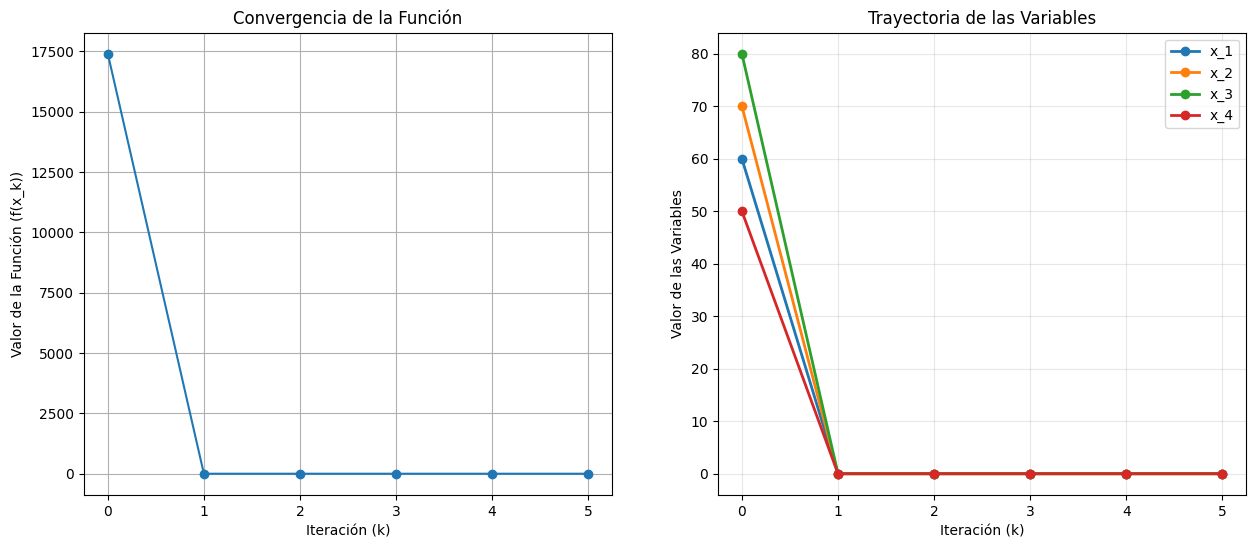

In [20]:
newton_opt = MetodoNewton(gradiente_func=gradiente_func_1, hessiano_func=hessiano_func_1)
K=5
x0 = np.array([60.0, 70.0, 80.0, 50.0])
solution = newton_opt.optimizar(x0, K)

print("FUNCIÓN 1: f(x) = Σ(x_i²)")
for i, punto in enumerate(solution):
    print(f"Iteración {i}: {punto}")
newton_opt.graficar_trayectoria(f=funcion_1)

FUNCIÓN 2: f(x,y) = (x² + y - 11)² + (x + y² - 7)²
Iteración 0: [4. 7.]
Iteración 1: [2.94575425 4.81035781]
Iteración 2: [2.64139127 3.43343232]
Iteración 3: [2.85443914 2.59204787]
Iteración 4: [2.96389448 2.15985132]
Iteración 5: [2.99626157 2.01678199]
Iteración 6: [2.99995222 2.00021648]
Iteración 7: [2.99999999 2.00000004]
Iteración 8: [3. 2.]
Iteración 9: [3. 2.]
Iteración 10: [3. 2.]


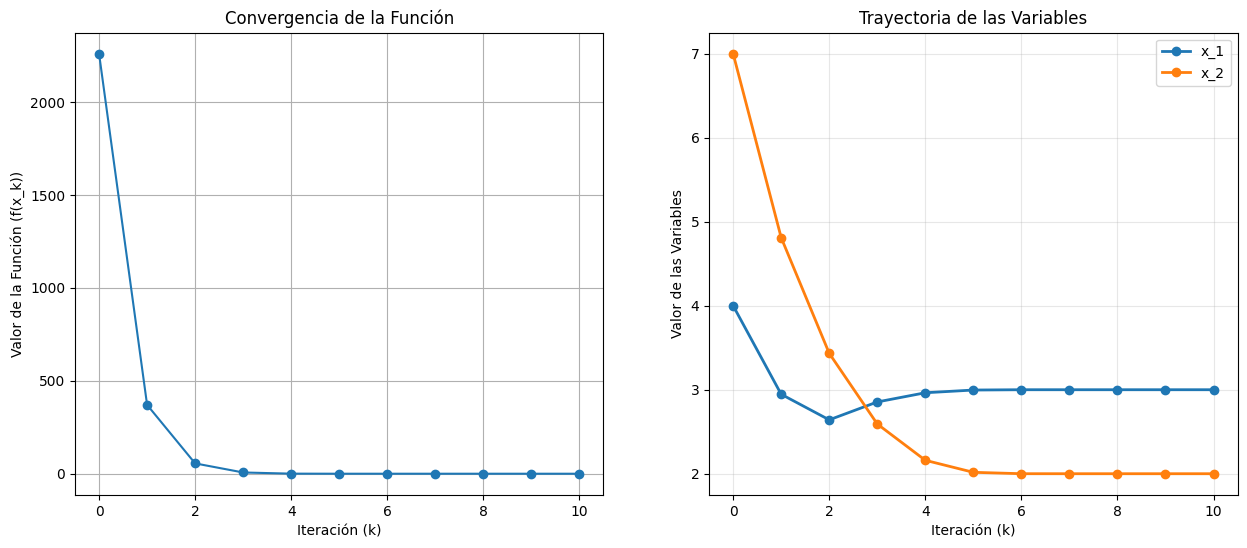

In [21]:
newton_opt = MetodoNewton(gradiente_func=gradiente_func_2, hessiano_func=hessiano_func_2)
K=10
x0 = np.array([4.0, 7.0])
solution = newton_opt.optimizar(x0, K)

print("FUNCIÓN 2: f(x,y) = (x² + y - 11)² + (x + y² - 7)²")
for i, punto in enumerate(solution):
    print(f"Iteración {i}: {punto}")

newton_opt.graficar_trayectoria(f=funcion_2)

FUNCIÓN 3: f(x) = Σ[100(x_(i+1) - x_i²)² + (x_i - 1)²] para i=1 hasta n-1
Iteración 0: [4. 3. 6.]
Iteración 1: [ 2.89692543  3.59278223 12.55669338]
Iteración 2: [ 2.40161639  4.70426092 20.89468591]
Iteración 3: [ 2.20216366  4.7239232  22.31506383]
Iteración 4: [1.81711989 3.13356008 7.28994393]
Iteración 5: [1.77036319 3.12978716 9.79555341]
Iteración 6: [ 1.19440517  1.09399407 -2.94763046]
Iteración 7: [1.07108927 1.09798286 1.20555046]
Iteración 8: [1.04618697 1.09295763 1.19453113]
Iteración 9: [1.00348161 1.00510498 1.00251794]
Iteración 10: [1.0014769  1.00295559 1.00591531]
Iteración 11: [1.00000198 1.0000018  0.99999487]
Iteración 12: [1.         1.         1.00000001]
Iteración 13: [1. 1. 1.]
Iteración 14: [1. 1. 1.]
Iteración 15: [1. 1. 1.]


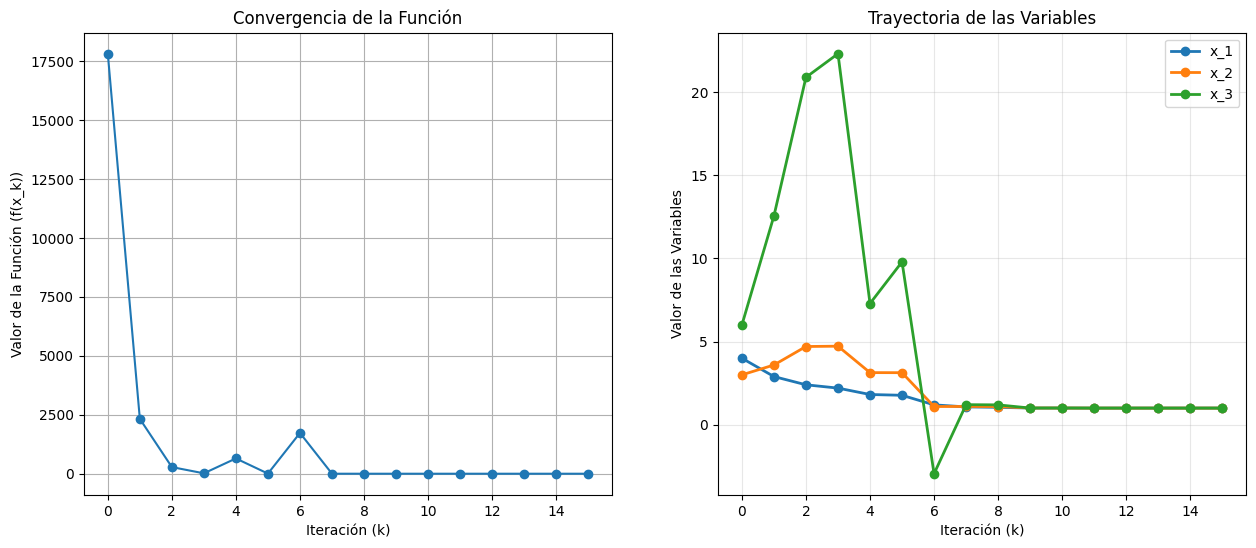

In [22]:
newton_opt = MetodoNewton(gradiente_func=gradiente_func_3, hessiano_func=hessiano_func_3)
K=15
x0 = np.array([4.0, 3.0, 6.0])
solution = newton_opt.optimizar(x0, K)

print("FUNCIÓN 3: f(x) = Σ[100(x_(i+1) - x_i²)² + (x_i - 1)²] para i=1 hasta n-1")
for i, punto in enumerate(solution):
    print(f"Iteración {i}: {punto}")
newton_opt.graficar_trayectoria(f=funcion_3)